In [1]:
#from skimpy import skim #data summary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import charset_normalizer
import seaborn as sns
import plotly.express as px #interactive visualization
import charset_normalizer
from plotly.subplots import make_subplots


In [2]:
with open("visualizing_global_co2_data_cleaned.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))
print(result)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [3]:
data = pd.read_csv('visualizing_global_co2_data_cleaned.csv', encoding = 'ascii')
df = pd.DataFrame(data)


In [4]:
#skim(df)

In [5]:
 info = pd.DataFrame({
    "Count":df.shape[0],
    "Null":df.isnull().sum(),
    "Null %":df.isnull().mean() * 100,
    "Zeros":(df == 0).sum(),
    "Zeros %":(df == 0).mean() * 100,
    "Unique":df.nunique(),
    "Duplicated":(df.duplicated() == True).sum(),
  
})
info
print(df["country"].nunique())

print(df["iso_code"].nunique())
print(df["country"].unique())


237
219
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia'
 'Asia (excl. China and India)' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'Faroe Islands' '

In [6]:
non_countries = [
    "Africa", "Asia", "Asia (excl. China and India)", "Europe", "Europe (excl. EU-27)",
    "Europe (excl. EU-28)", "European Union (27)", "European Union (28)", 
    "High-income countries", "Low-income countries", "Lower-middle-income countries", 
    "North America", "North America (excl. USA)", "Oceania", "South America", "World"
]

countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
    'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
    'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
    'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
    'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
    'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
    'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
    'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
    'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
    'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica',
    'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Lao People’s Democratic Republic',
    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar',
    'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico',
    'Micronesia (Federated States of)', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique',
    'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
    'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
    'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Rwanda',
    'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino',
    'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
    'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
    'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste',
    'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
    'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania',
    'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'
]

df_filtered_country = df[df["country"].isin(countries)].copy()

print(df_filtered_country["country"].unique())
print(df_filtered_country["country"].nunique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon' 'Lesotho'
 'Liberia' 'Libya' 'Liechtenste

#Eliminar datos C02 = 0

In [7]:
co2_zeros = (df["co2"] == 0).sum()

df = df.drop(df[df["co2"] == 0].index)
print(co2_zeros)

102


In [8]:
df_it1 = df[["country","year","co2","co2_including_luc"]]


info1 = pd.DataFrame({
    "Count":df_it1.shape[0],
    "Null":df_it1.isnull().sum(),
    "Null %":df_it1.isnull().mean() * 100,
    "Zeros":(df_it1 == 0).sum(),
    "Zeros %":(df_it1 == 0).mean() * 100,
    "Unique":df_it1.nunique(),
    "Duplicated":(df_it1.duplicated() == True).sum(),
    "Under Zeros":(df_it1["co2_including_luc"] < 0).sum() 
})
info1

,Count,Null,Null %,Zeros,Zeros %,Unique,Duplicated,Under Zeros
country,23392,0,0.000000,0,0.0000,237,0,369
year,23392,0,0.000000,0,0.0000,172,0,369
co2,23392,0,0.000000,0,0.0000,14458,0,369
co2_including_luc,23392,953,4.074042,8,0.0342,18675,0,369


In [9]:

df_it1 = df[[ "year", "co2", "co2_including_luc"]].copy()


info1 = pd.DataFrame({
    "Count": [df_it1.shape[0]] * len(df_it1.columns),
    "Null": df_it1.isnull().sum(),
    "Null %": df_it1.isnull().mean() * 100,
    "Zeros": (df_it1 == 0).sum(),
    "Zeros %": (df_it1 == 0).mean() * 100,
    "Unique": df_it1.nunique(),
    "Duplicated": [df_it1.duplicated().sum()] * len(df_it1.columns),
    "Under Zeros": (df_it1 < 0).sum()
}, index=df_it1.columns)

print(info1)
df_it1["country"] =df["country"]
df_it1.columns

                   Count  Null    Null %  Zeros  Zeros %  Unique  Duplicated  \
year               23392     0  0.000000      0   0.0000     172         132   
co2                23392     0  0.000000      0   0.0000   14458         132   
co2_including_luc  23392   953  4.074042      8   0.0342   18675         132   

                   Under Zeros  
year                         0  
co2                          0  
co2_including_luc          369  


Index(['year', 'co2', 'co2_including_luc', 'country'], dtype='object')

Imputamos el valor de Co2 a co2_including_luc, cuando co2_including_luc < 0

### Which sectors are most responsible for emissions, and how has their
### contribution varied over the decades?

In [10]:
df_it2 = df[[ "year","cement_co2", "coal_co2","flaring_co2", "gas_co2","land_use_change_co2", "oil_co2"]].copy()

info2 = pd.DataFrame({
    "Count": [df_it2.shape[0]] * len(df_it2.columns),
    "Null": df_it2.isnull().sum(),
    "Null %": df_it2.isnull().mean() * 100,
    "Zeros": (df_it2 == 0).sum(),
    "Zeros %": (df_it2 == 0).mean() * 100,
    "Unique": df_it2.nunique(),
    "Duplicated": [df_it2.duplicated().sum()] * len(df_it2.columns),
    "Under Zeros": (df_it2 < 0).sum()
}, index=df_it2.columns)

print(info2)

                     Count  Null     Null %  Zeros    Zeros %  Unique  \
year                 23392     0   0.000000      0   0.000000     172   
cement_co2           23392  3481  14.881156   7056  30.164159    5261   
coal_co2             23392     0   0.000000   6719  28.723495   10076   
flaring_co2          23392    95   0.406122  18370  78.531122    3266   
gas_co2              23392    27   0.115424  14120  60.362517    6168   
land_use_change_co2  23392   953   4.074042    915   3.911594    7001   
oil_co2              23392     0   0.000000   2335   9.982045   10528   

                     Duplicated  Under Zeros  
year                        112            0  
cement_co2                  112            0  
coal_co2                    112            0  
flaring_co2                 112            0  
gas_co2                     112            0  
land_use_change_co2         112         3470  
oil_co2                     112            0  


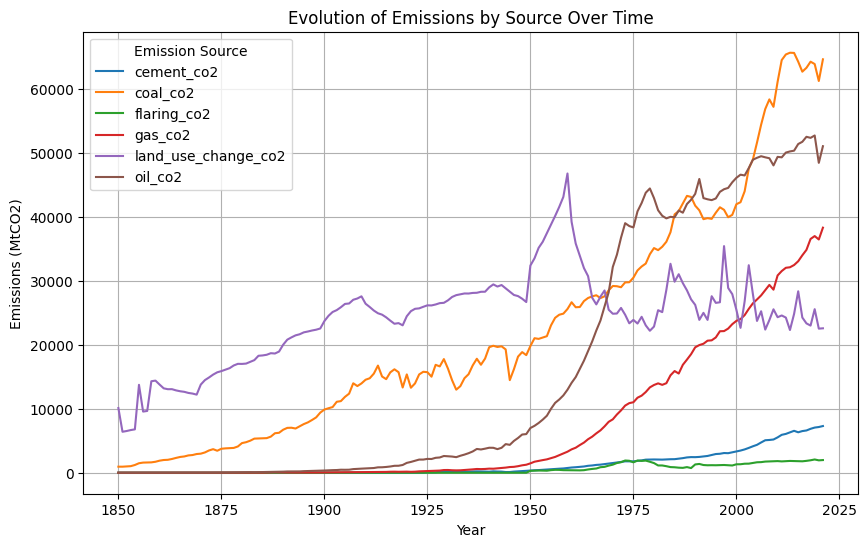

In [11]:
df_it2_grouped = df_it2.groupby("year").sum().reset_index()

plt.figure(figsize=(10, 6))

for column in df_it2_grouped.columns[1:]:
    plt.plot(df_it2_grouped["year"], df_it2_grouped[column], label=column)

plt.xlabel("Year")
plt.ylabel("Emissions (MtCO2)")
plt.title("Evolution of Emissions by Source Over Time")
plt.legend(title="Emission Source")
plt.grid(True)
plt.show()

#Total Co2 agrupado en años

## histograma de valores nulos de cement

            Count  Null  Null %  Zeros  Zeros %  Unique  Duplicated  \
year         3481     0     0.0      0      0.0     131        3350   
cement_co2   3481  3481   100.0      0      0.0       0        3350   

            Under Zeros  
year                  0  
cement_co2            0  


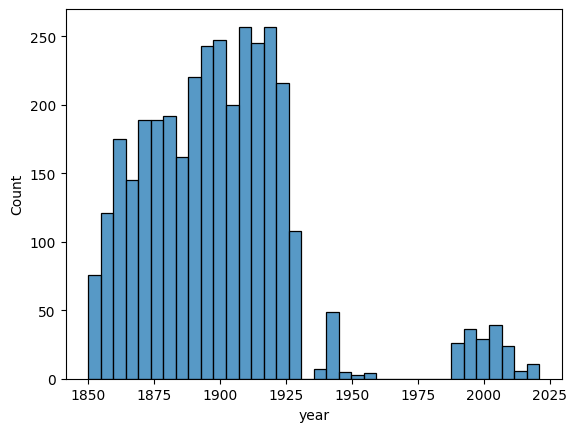

In [12]:
df_cement_nulls = df[df["cement_co2"].isnull()][["year", "cement_co2"]]
df_cement_nulls.head()

info_cement = pd.DataFrame({
    "Count": [df_cement_nulls.shape[0]] * len(df_cement_nulls.columns),
    "Null": df_cement_nulls.isnull().sum(),
    "Null %": df_cement_nulls.isnull().mean() * 100,
    "Zeros": (df_cement_nulls == 0).sum(),
    "Zeros %": (df_cement_nulls == 0).mean() * 100,
    "Unique": df_cement_nulls.nunique(),
    "Duplicated": [df_cement_nulls.duplicated().sum()] * len(df_cement_nulls.columns),
    "Under Zeros": (df_cement_nulls < 0).sum()
}, index=df_cement_nulls.columns)

print(info_cement)

sns.histplot(data=df_cement_nulls, x="year")
plt.show()

## Después de comprobar los datos nulos y ver su irrelevancia, procedemos a eliminarlos.

In [13]:
df = df[~(df['cement_co2'].isnull() & (df['year'] > 1930))]
df

,country,year,iso_code,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
0,Afghanistan,1949,AFG,7356890.0,0.000,0.000,0.015,NaN,NaN,8.039,...,0.000,NaN,0.0,0.160,0.000,0.129,0.000,0.000,0.000,0.0
1,Afghanistan,1950,AFG,7480464.0,0.000,0.000,0.084,0.070,475.000,8.585,...,0.000,0.0,0.0,0.157,0.004,0.129,0.000,0.000,0.000,0.0
2,Afghanistan,1951,AFG,7571542.0,0.000,0.000,0.092,0.007,8.696,9.142,...,0.000,0.0,0.0,0.162,0.004,0.129,0.000,0.000,0.001,0.0
3,Afghanistan,1952,AFG,7667534.0,0.000,0.000,0.092,0.000,0.000,9.948,...,0.001,0.0,0.0,0.172,0.003,0.129,0.000,0.000,0.001,0.0
4,Afghanistan,1953,AFG,7764549.0,0.000,0.000,0.106,0.015,16.000,10.915,...,0.001,0.0,0.0,0.185,0.003,0.129,0.000,0.000,0.001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23489,Zimbabwe,2017,ZWE,14751101.0,0.469,0.032,9.596,-0.937,-8.899,19.086,...,0.024,0.0,0.0,0.219,0.026,0.114,0.001,0.001,0.002,0.0
23490,Zimbabwe,2018,ZWE,15052191.0,0.558,0.037,11.795,2.199,22.920,20.626,...,0.025,0.0,0.0,0.211,0.033,0.114,0.001,0.001,0.002,0.0
23491,Zimbabwe,2019,ZWE,15354606.0,0.570,0.037,11.115,-0.681,-5.772,19.432,...,0.025,0.0,0.0,0.183,0.030,0.113,0.001,0.001,0.002,0.0
23492,Zimbabwe,2020,ZWE,15669663.0,0.570,0.036,10.608,-0.507,-4.559,18.485,...,0.025,0.0,0.0,0.194,0.030,0.112,0.001,0.001,0.002,0.0


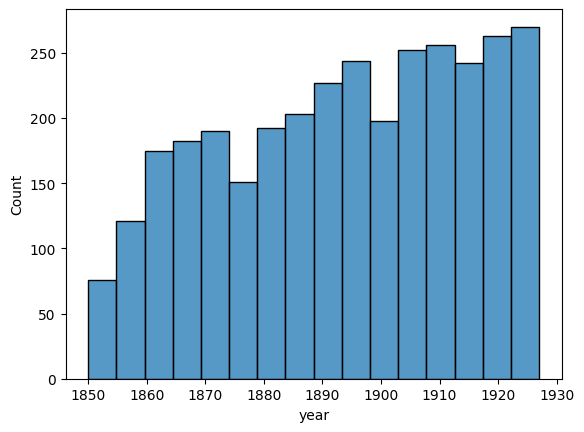

In [14]:
df_cement_nulls = df[df["cement_co2"].isnull()][["year", "cement_co2"]]

sns.histplot(data=df_cement_nulls, x="year")
plt.show()

                     Count  Null     Null %  Zeros    Zeros %  Unique  \
year                 23392     0   0.000000      0   0.000000     172   
cement_co2           23392  3481  14.881156   7056  30.164159    5261   
coal_co2             23392     0   0.000000   6719  28.723495   10076   
flaring_co2          23392    95   0.406122  18370  78.531122    3266   
gas_co2              23392    27   0.115424  14120  60.362517    6168   
land_use_change_co2  23392   953   4.074042    915   3.911594    7001   
oil_co2              23392     0   0.000000   2335   9.982045   10528   

                     Duplicated  Under Zeros  
year                        112            0  
cement_co2                  112            0  
coal_co2                    112            0  
flaring_co2                 112            0  
gas_co2                     112            0  
land_use_change_co2         112         3470  
oil_co2                     112            0  
                                 year  

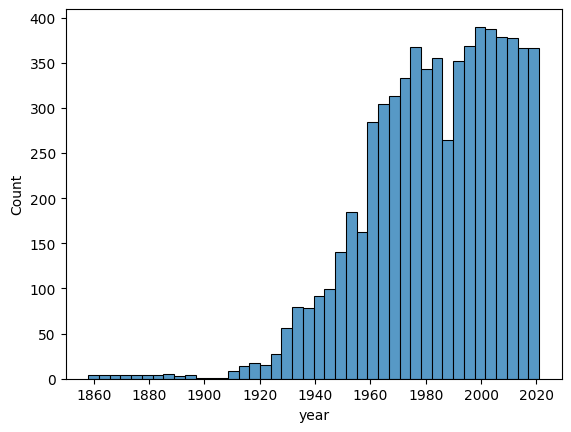

In [15]:
info_oil = pd.DataFrame({
    "Count": [df_it2.shape[0]] * len(df_it2.columns),
    "Null": df_it2.isnull().sum(),
    "Null %": df_it2.isnull().mean() * 100,
    "Zeros": (df_it2 == 0).sum(),
    "Zeros %": (df_it2 == 0).mean() * 100,
    "Unique": df_it2.nunique(),
    "Duplicated": [df_it2.duplicated().sum()] * len(df_it2.columns),
    "Under Zeros": (df_it2 < 0).sum()
}, index=df_it2.columns)

print(info_oil)

df_coal_zero = df[df["coal_co2"] == 0][["year", "coal_co2","country"]]

df_coal_zero_grouped = df_coal_zero.groupby("country").count()
print(df_coal_zero_grouped.sort_values(by="coal_co2"))

print(df_coal_zero["country"].unique())
sns.histplot(data=df_coal_zero, x="year")
plt.show()

### Unificamos criterios

los nulos pasan a ser ceros.

In [16]:
columns_to_check = ["cement_co2", "coal_co2", "flaring_co2", "gas_co2", "land_use_change_co2", "oil_co2"]

df[columns_to_check].fillna(0, inplace=True)

info = pd.DataFrame({
    "Count": [df.shape[0]] * len(columns_to_check),
    "Null": df[columns_to_check].isnull().sum(),
    "Null %": df[columns_to_check].isnull().mean() * 100,
    "Zeros": (df[columns_to_check] == 0).sum(),
    "Zeros %": (df[columns_to_check] == 0).mean() * 100,
    "Unique": df[columns_to_check].nunique(),
    "Duplicated": [df.duplicated().sum()] * len(columns_to_check),
    "Under Zeros": (df[columns_to_check] < 0).sum()
}, index=columns_to_check)

print(info)


                     Count  Null     Null %  Zeros    Zeros %  Unique  \
cement_co2           23153  3242  14.002505   7056  30.475532    5261   
coal_co2             23153     0   0.000000   6569  28.372133   10054   
flaring_co2          23153    95   0.410314  18132  78.313825    3266   
gas_co2              23153    27   0.116616  13891  59.996545    6165   
land_use_change_co2  23153   916   3.956291    915   3.951972    6992   
oil_co2              23153     0   0.000000   2335  10.085086   10498   

                     Duplicated  Under Zeros  
cement_co2                    0            0  
coal_co2                      0            0  
flaring_co2                   0            0  
gas_co2                       0            0  
land_use_change_co2           0         3449  
oil_co2                       0            0  


/tmp/ipykernel_5069/2473270452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_check].fillna(0, inplace=True)


## Comenzamos el análisis

#### How has the global trend of CO2 emissions evolved, and which periods have shown significant changes in this trajectory?


/tmp/ipykernel_5069/3053648538.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Emission Source")


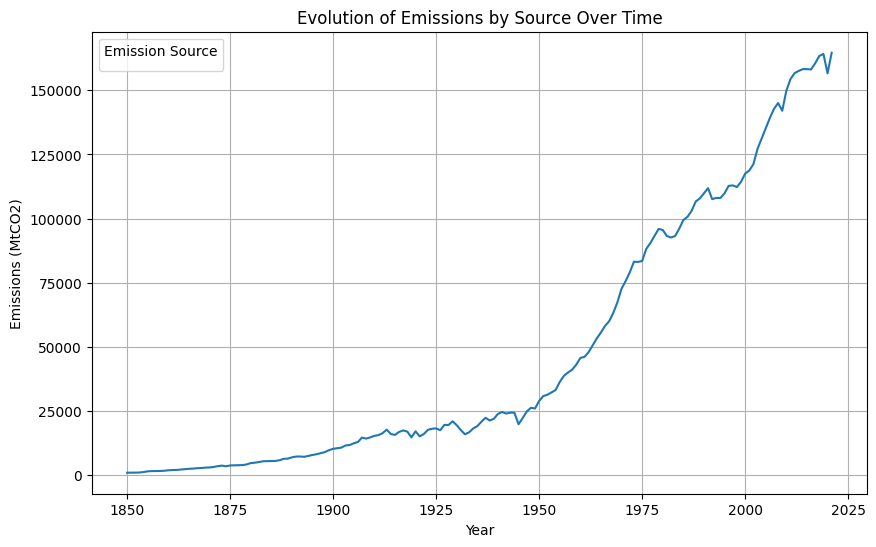

In [17]:
df_it1_grouped = df.groupby("year")['co2'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(df_it1_grouped["year"], df_it1_grouped['co2'])

plt.xlabel("Year")
plt.ylabel("Emissions (MtCO2)")
plt.title("Evolution of Emissions by Source Over Time")
plt.legend(title="Emission Source")
plt.grid(True)
plt.show()

In [18]:
df_world = df[df['country'] == 'World']
df_world
# skim(df_world)

,country,year,iso_code,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
23064,World,1855,NaN,1.287786e+09,NaN,NaN,260.166,5.027,1.970,2903.986,...,100.0,NaN,NaN,100.0,100.0,100.0,0.002,0.006,0.009,0.000
23065,World,1856,NaN,1.289613e+09,NaN,NaN,277.292,17.126,6.583,2953.355,...,100.0,NaN,NaN,100.0,100.0,100.0,0.003,0.008,0.011,0.000
23066,World,1857,NaN,1.291556e+09,NaN,NaN,279.889,2.598,0.937,2979.769,...,100.0,NaN,NaN,100.0,100.0,100.0,0.003,0.009,0.013,0.000
23067,World,1858,NaN,1.293617e+09,NaN,NaN,284.171,4.282,1.530,3015.439,...,100.0,NaN,NaN,100.0,100.0,100.0,0.004,0.010,0.015,0.001
23068,World,1859,NaN,1.296053e+09,NaN,NaN,301.312,17.140,6.032,3062.136,...,100.0,NaN,NaN,100.0,100.0,100.0,0.004,0.012,0.016,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23226,World,2017,NaN,7.599822e+09,1507.923,0.198,36096.738,572.547,1.612,40428.684,...,100.0,100.0,100.0,100.0,100.0,100.0,0.394,1.039,1.511,0.078
23227,World,2018,NaN,7.683790e+09,1569.218,0.204,36826.508,729.772,2.022,41007.867,...,100.0,100.0,100.0,100.0,100.0,100.0,0.399,1.058,1.536,0.079
23228,World,2019,NaN,7.764951e+09,1617.507,0.208,37082.559,256.049,0.695,41639.840,...,100.0,100.0,100.0,100.0,100.0,100.0,0.404,1.076,1.561,0.081
23229,World,2020,NaN,7.840953e+09,1637.537,0.209,35264.086,-1818.472,-4.904,39321.844,...,100.0,100.0,100.0,100.0,100.0,100.0,0.410,1.094,1.585,0.082


# Iteration 2

##### Which sectors are most responsible for emissions, and how has their contribution varied over the decades?


In [19]:
fig = px.line(df_emission_long, 
              x="year", 
              y="emission_value", 
              color="emission_source", 
              facet_col="emission_source",    
              facet_col_wrap=3,               
              title="Emisiones de CO₂ por Fuente a lo largo del Tiempo",
              labels={"year": "Año", "emission_value": "Emisiones de CO₂ (toneladas)", "emission_source": "Fuente de Emisión"},
              width=1000,
              height=700)
fig.update_layout(
    margin=dict(t=50, b=50, r=50, l=50),  
    height=800,                      
    title_x=0.5,                         
)

fig.show()

NameError: name 'df_emission_long' is not defined

observamos que el petróleo y el carbón son las mayores fuentes de emisión. el gas ha estado y sigue en crecimiento durante los 
últimos años


### contribución total histórica por sector

In [ ]:
df_bar = df_emission_source[emission_source_columns].sum().reset_index()



#renombramos columnas
df_bar.columns = ['category', 'value'] 



fig = px.bar(df_bar, x='category', y='value',
             title='Emisiones de CO2 por Categoría',
             labels={'value': 'Emisiones (toneladas)', 'category': 'Categoría'},
             color='value', 
             color_continuous_scale=px.colors.sequential.Viridis)

# Mostrar el gráfico
fig.show()

### contribución últimos 10 años

In [ ]:
emission_source_columns = ["cement_co2", "coal_co2", "flaring_co2", "gas_co2", "land_use_change_co2", "oil_co2"]

df_emission_source_last_10_years = df_emission_source[df_emission_source['year'] >= 2010 ][['year'] + emission_source_columns]

total_last_10_years = df_emission_source_last_10_years[emission_source_columns].sum().reset_index()

total_last_10_years.columns= ["category", "value"]

total_last_10_years


fig = px.bar(total_last_10_years, x='category', y='value',
             title='Emisiones de CO2 por Categoría',
             labels={'value': 'Emisiones (toneladas)', 'category': 'Categoría'},
             color='value', 
             color_continuous_scale=px.colors.sequential.Viridis)

# Mostrar el gráfico
fig.show()